# AA Tau Figures for the Paper

Quick Links:

* [Spectra, Dec02](#spectra02)
* [Spectra, Dec12](#spectra12)
* [Color-color/mag, subset](#colorcolorsub)
* [Emipirical extinction curve](#empext)
* [Color excess curves](#colorexcesscurves)
* [Various NIR extinction curves](#NIRextcurves)
* [EW ratios + I ratios](#veilratios)
* [Veiling Emission](#veilingemission)
* [Color-color/mag, with veiling](#colorcolorall)
* [SED](#sed)
* Linear EW ratio for data section


In [2]:
import numpy as np
import tarfile
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.interpolate as interp
from sys import platform
from astropy.io import fits
from astropy.io import ascii
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from dust_extinction.parameter_averages import F99
import dust_extinction.parameter_averages as de

In [3]:
# %matplotlib notebook  
%matplotlib inline

Read in data files reduced by earlier notebook:

In [4]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

Make an interpolation function to divide one spectrum by the other:

In [5]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)

# Figure: Spectra, Dec 02 <a name="spectra02"></a>

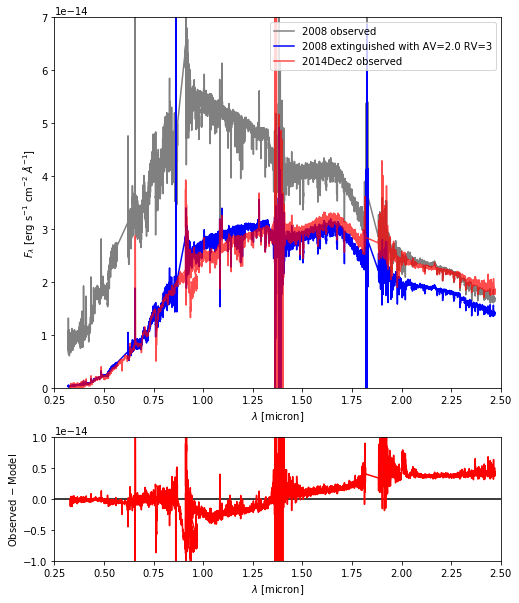

In [6]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 extinguished with AV=2.0 RV=3")
ax1.plot(allwav_dec02,alldata_dec02,'red',label='2014Dec2 observed',alpha=0.7)
ax1.set_ylim(0,0.7E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')
ax1.legend(loc='upper right')

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec02,alldata_dec02-
         interp2008(allwav_dec02)*alldata_2008.unit*ext.extinguish(allwav_dec02,Av=2.0),'r')
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Observed $-$ Model')


# plt.show()
plt.savefig('spectrum1.eps',bbox_inches='tight')

# Figure: Spectra, Dec 12 <a name="spectra12"></a>

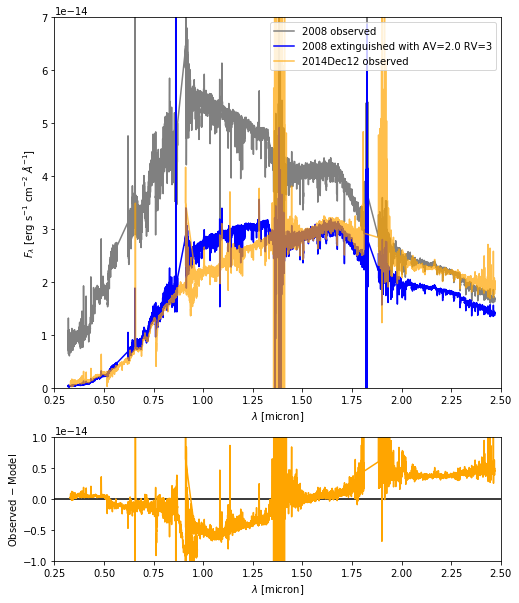

In [7]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 extinguished with AV=2.0 RV=3")
ax1.plot(allwav_dec12,alldata_dec12,'orange',label='2014Dec12 observed',alpha=0.7)
ax1.set_ylim(0,0.7E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')
ax1.legend(loc='upper right')

allwav_dec12clip = allwav_dec12[allwav_dec12<2.47*u.micron]
alldata_dec12clip= alldata_dec12[allwav_dec12<2.47*u.micron]

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec12clip,alldata_dec12clip-
         interp2008(allwav_dec12clip)*alldata_2008.unit*ext.extinguish(allwav_dec12clip,Av=2.0),'orange')
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Observed $-$ Model')

# plt.show()
plt.savefig('spectrum2.eps',bbox_inches='tight')

# Figure: Color-color/mag plots subset <a name="colorcolorsub"></a>

In [8]:
# Copied from AATau_photometry
mags1=np.array([ 8.12545762,  8.63775381,  9.4796061 , 10.54233954, 11.57235532,
       12.84902046, 13.99366631])
mags2=np.array([ 8.1190166 ,  8.90018651, 10.03621318, 11.49856709, 12.84199828,
       14.84816432, 16.58947888])

# Order of this array is for A in [2.0,4.0], then for R in [2.0,3.0,5.0]:
mags1ext=np.array([[ 8.34920393,  8.98590141,  9.99722394, 11.32340427, 12.6551131 ,
        14.65587901, 16.74044124],
       [ 8.34196653,  8.96827834,  9.9944421 , 11.41831284, 12.82419083,
        14.72582521, 16.50511259],
       [ 8.33616823,  8.95416742,  9.9921507 , 11.49314381, 12.95895849,
        14.77624733, 16.3072267 ],
       [ 8.5726541 ,  9.33342211, 10.51339964, 12.09452271, 13.7034493 ,
        16.38573996, 19.36822833],
       [ 8.55824921,  9.29820724, 10.50705777, 12.27498226, 14.03625984,
        16.56566564, 18.96291505],
       [ 8.54670183,  9.27000966, 10.50173639, 12.41498897, 14.30036294,
        16.68845579, 18.6013921 ]])

In [9]:
bands=['K','H','J','I','R','V','B']

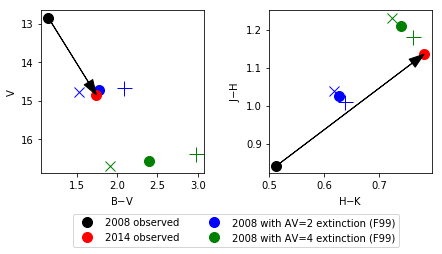

In [10]:
fig,axes=plt.subplots(1,2,figsize=(7,3))

j=5
axes[0].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j],'+',color='blue',markersize=15)
axes[0].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j],'o',color='blue',markersize=10)
axes[0].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j],'x',color='blue',markersize=10)
axes[0].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j],'+',color='green',markersize=15)
axes[0].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j],'o',color='green',markersize=10)
axes[0].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j],'x',color='green',markersize=10)

axes[0].plot(mags1[j+1]-mags1[j],mags1[j],'o',color='black',markersize=10)
axes[0].plot(mags2[j+1]-mags2[j],mags2[j],'o',color='red',markersize=10)
axes[0].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='black',headwidth=10,headlength=15,width=0.1))
axes[0].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[0].set_ylabel(bands[j])



j=0     
axes[1].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='black',headwidth=10,headlength=15,width=0.1))
axes[1].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008 observed',markersize=10)
axes[1].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[1].set_ylabel(bands[j+2]+'$-$'+bands[j+1])

axes[1].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red',label='2014 observed',markersize=10)  

axes[1].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='_2008 with AV=2 RV=2 (F99)',markersize=15)
axes[1].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008 with AV=2 extinction (F99)',markersize=10)
axes[1].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='_2008 with AV=2 RV=5 (F99)',markersize=10)
axes[1].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='_2008 with AV=4 RV=2 (F99)',markersize=15)
axes[1].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008 with AV=4 extinction (F99)',markersize=10)
axes[1].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='_2008 with AV=4 RV=5 (F99)',markersize=10)



fig.subplots_adjust(wspace=0.4)
# axes[1].legend(loc='center right', bbox_to_anchor=(.5,1.4))

axes[0].set_ylim(axes[0].get_ylim()[::-1])

axes[1].legend(bbox_to_anchor=(-1.2, -0.45, 2.0, 1.), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.0)

# plt.show()
plt.savefig('colormags_subset.eps',bbox_inches='tight')

# Figure: Empirical Extinction Curve <a name="empext"></a>

In [11]:
ext_dec02=-2.5*np.log10((alldata_dec02/interp2008(allwav_dec02)).value)

C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


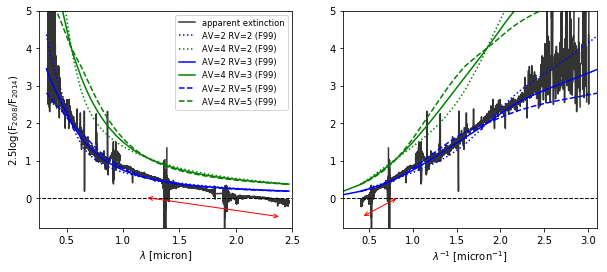

In [12]:
fig,axs=plt.subplots(1,2,figsize=(10,4))

axs[0].plot(allwav_dec02,ext_dec02,'k',alpha=0.8,label='apparent extinction')
axs[1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.8)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2 RV='+legend+' (F99)')
    axs[1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4 RV='+legend+' (F99)')
    axs[1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[0].legend(loc='best',fontsize='small')
axs[0].set_ylabel('2.5log(F$_{2008}$/F$_{2014}$)')
axs[0].set_xlabel('$\lambda$ [micron]')
axs[1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0].set_ylim(-0.8,5.0)
axs[1].set_ylim(-0.8,5.0)
axs[0].set_xlim(0.25,2.5)
axs[1].set_xlim(0.20,3.1)

axs[0].annotate("",xy=(1.2,0.02), xycoords='data',
    xytext=(2.4,-0.5),textcoords='data',
    arrowprops=dict(color='red',arrowstyle='<->'))

axs[1].annotate("",xy=(1/1.2,0.02), xycoords='data',
    xytext=(1/2.4,-0.5),textcoords='data',
    arrowprops=dict(color='red',arrowstyle='<->'))

axs[0].plot([0,3],[0,0],'--k',linewidth=1)
axs[1].plot([0,4],[0,0],'--k',linewidth=1)

axs[1].plot([0,1/allwav_2008[-1].value],[0,2.0*ext(allwav_2008[-1])],'b')
axs[1].plot([0,1/allwav_2008[-1].value],[0,4.0*ext(allwav_2008[-1])],'g')

# plt.show()
plt.savefig('flux_ratio.eps',bbox_inches='tight')

# Figure: V & K Color curves <a name="colorexcesscurves"></a>

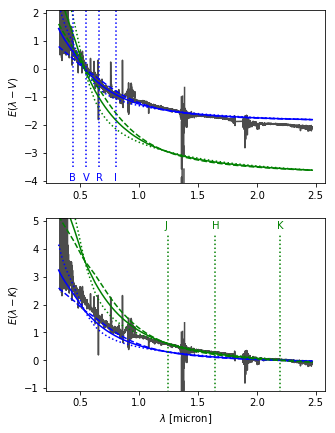

In [13]:
fig,axs=plt.subplots(2,1,figsize=(5,7))

axs[0].set_ylabel('$E(\lambda-V)$')      
axs[0].plot(allwav_dec02,ext_dec02-2.0,'k',alpha=0.7)
for R,line, in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=R)
    axs[0].plot(allwav_2008,2.0*ext(allwav_2008)-2.0,'b',linestyle=line)
    axs[0].plot(allwav_2008,4.0*ext(allwav_2008)-4.0,'g',linestyle=line)
axs[0].set_ylim(-4.1,2.1)

AK=mags2[0]-mags1[0] # observed A_K: K in 2014 - K in 2008
AKext=mags1ext[:,0]-mags1[0] # K for 2008 extinguished for all 6 models - K in 2008
# get R=3 in the j=1 element (AV=2) and j=4 element (AV=4)
j=1

axs[0].plot([.44,.44],[-3.5,3],'b',linestyle='dotted')
axs[0].plot([.55,.55],[-3.5,3],'b',linestyle='dotted')
axs[0].plot([.66,.66],[-3.5,3],'b',linestyle='dotted')
axs[0].plot([.81,.81],[-3.5,3],'b',linestyle='dotted')

axs[0].text(0.41,-4,'B',color='blue')
axs[0].text(0.525,-4,'V',color='blue')
axs[0].text(0.635,-4,'R',color='blue')
axs[0].text(0.79,-4,'I',color='blue')

axs[1].set_ylabel('$E(\lambda-K)$')      
axs[1].plot(allwav_dec02,(ext_dec02-AK),'k',alpha=0.7,label='2008 -> 2014')
for R,line, in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=R)
    axs[1].plot(allwav_2008,(2.0*ext(allwav_2008)-AKext[j]),'b',linestyle=line)
    axs[1].plot(allwav_2008,(4.0*ext(allwav_2008)-AKext[j+3]),'g',linestyle=line)
axs[1].set_ylim(-1.1,5.1)

axs[1].set_xlabel('$\lambda$ [micron]')

axs[1].plot([1.25,1.25],[-2,4.5],'g',linestyle='dotted')
axs[1].plot([1.65,1.65],[-2,4.5],'g',linestyle='dotted')
axs[1].plot([2.2,2.2],[-2,4.5],'g',linestyle='dotted')

axs[1].text(1.22,4.7,'J',color='green')
axs[1].text(1.62,4.7,'H',color='green')
axs[1].text(2.17,4.7,'K',color='green')

fig.subplots_adjust(hspace=0.2)

# plt.show()
plt.savefig('colorcurves.eps',bbox_inches='tight')

# Figure: Just infrared, extinction with models <a name="NIRextcurves"></a>

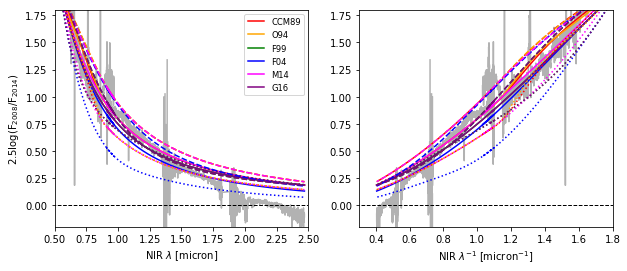

In [14]:
fig,axs=plt.subplots(1,2,figsize=(10,4))

CCM89 = de.CCM89(Rv=3.0)
O94 = de.O94(Rv=3.0)
F99 = de.F99(Rv=3.0)
F04 = de.F04(Rv=3.0)
M14 = de.M14(Rv=3.0)
# GCC09_MWAvg = de.GCC09_MWAvg()
G16 = de.G16(RvA=3.0, fA=1.0)

wavelengths=allwav_dec02

style='solid'

axs[0].plot(allwav_dec02,ext_dec02,'k',alpha=0.3)
axs[1].plot(1/allwav_dec02,ext_dec02,'k',alpha=0.3)


axs[0].plot(wavelengths, -2.5*np.log10(CCM89.extinguish(wavelengths, Av=2)),'red',label='CCM89',linestyle=style)
axs[0].plot(wavelengths, -2.5*np.log10(O94.extinguish(wavelengths, Av=2)),'orange',label='O94',linestyle=style)
axs[0].plot(wavelengths, -2.5*np.log10(F99.extinguish(wavelengths, Av=2)),'green',label='F99',linestyle=style)
axs[0].plot(wavelengths, -2.5*np.log10(F04.extinguish(wavelengths, Av=2)),'blue',label='F04',linestyle=style)
axs[0].plot(wavelengths, -2.5*np.log10(M14.extinguish(wavelengths, Av=2)),'magenta',label='M14',linestyle=style)
axs[0].plot(wavelengths, -2.5*np.log10(G16.extinguish(wavelengths, Av=2)),'purple',label='G16',linestyle=style)

def explot(i):
    axs[i].plot(wavelengths, -2.5*np.log10(CCM89.extinguish(wavelengths, Av=2)),'red',label='_CCM89',linestyle=style)
    axs[i].plot(wavelengths, -2.5*np.log10(O94.extinguish(wavelengths, Av=2)),'orange',label='_O94',linestyle=style)
    axs[i].plot(wavelengths, -2.5*np.log10(F99.extinguish(wavelengths, Av=2)),'green',label='_F99',linestyle=style)
    axs[i].plot(wavelengths, -2.5*np.log10(F04.extinguish(wavelengths, Av=2)),'blue',label='_F04',linestyle=style)
    axs[i].plot(wavelengths, -2.5*np.log10(M14.extinguish(wavelengths, Av=2)),'magenta',label='_M14',linestyle=style)
    axs[i].plot(wavelengths, -2.5*np.log10(G16.extinguish(wavelengths, Av=2)),'purple',label='_G16',linestyle=style)

wavelengths=1/allwav_dec02
explot(1)
    
CCM89 = de.CCM89(Rv=2.0)
O94 = de.O94(Rv=2.0)
F99 = de.F99(Rv=2.0)
F04 = de.F04(Rv=2.0)
M14 = de.M14(Rv=2.0)
G16 = de.G16(RvA=2.0, fA=1.0)

style='dotted'
wavelengths=allwav_dec02
explot(0)
wavelengths=1/allwav_dec02
explot(1)

CCM89 = de.CCM89(Rv=5.0)
O94 = de.O94(Rv=5.0)
F99 = de.F99(Rv=5.0)
F04 = de.F04(Rv=5.0)
M14 = de.M14(Rv=5.0)
G16 = de.G16(RvA=5.0, fA=1.0)

style='dashed'
wavelengths=allwav_dec02
explot(0)
wavelengths=1/allwav_dec02
explot(1)

axs[0].set_ylabel('2.5log(F$_{2008}$/F$_{2014}$)')

axs[0].set_ylim(-0.2,1.8)
axs[1].set_ylim(-0.2,1.8)
axs[0].set_xlim(.5,2.5)
axs[1].set_xlim(.3,1.8)
axs[0].legend(loc='best',fontsize='small')

axs[0].plot([0,3],[0,0],'--k',linewidth=1)
axs[1].plot([0,3],[0,0],'--k',linewidth=1)


axs[0].set_xlabel('NIR $\lambda$ [micron]')
axs[1].set_xlabel('NIR $\lambda^{-1}$ [micron$^{-1}$]')

# plt.show()
plt.savefig('IRcurves.eps',bbox_inches='tight')

# Figure: EW ratios and line intensity ratios <a name="veilratios"></a>

In [15]:
lines=ascii.read('line_output.txt')
# lines

C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


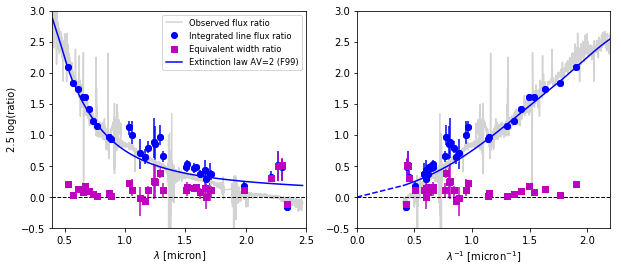

In [16]:
fig,axs=plt.subplots(1,2,figsize=(10,4))


axs[0].plot(allwav_dec02,ext_dec02,'lightgrey',label='Observed flux ratio')
axs[1].plot(1/allwav_dec02,ext_dec02,'lightgrey',label='Observed flux ratio')

axs[0].plot(lines['LineLambda'],2.5*np.log10(lines['Iratio']),'bo',label='Integrated line flux ratio')
axs[1].plot(1/lines['LineLambda'],2.5*np.log10(lines['Iratio']),'bo',label='Integrated line flux ratio')
lower_err = 2.5*np.log10(lines['Iratio']) - 2.5*np.log10(lines['Imin'])
upper_err = 2.5*np.log10(lines['Imax']) - 2.5*np.log10(lines['Iratio'])
asymmetric_error = [lower_err, upper_err]
axs[0].errorbar(lines['LineLambda'],2.5*np.log10(lines['Iratio']), yerr=asymmetric_error, fmt='bo',label='_I ratio range')
axs[1].errorbar(1/lines['LineLambda'],2.5*np.log10(lines['Iratio']), yerr=asymmetric_error, fmt='bo',label='_I ratio range')

axs[0].plot(lines['LineLambda'],2.5*np.log10(lines['EWratio']),'ms',label='Equivalent width ratio')
axs[1].plot(1/lines['LineLambda'],2.5*np.log10(lines['EWratio']),'ms',label='Equivalent width ratio')
lower_err = 2.5*np.log10(lines['EWratio']) - 2.5*np.log10(lines['EWmin'])
upper_err = 2.5*np.log10(lines['EWmax']) - 2.5*np.log10(lines['EWratio'])
asymmetric_error = [lower_err, upper_err]
axs[0].errorbar(lines['LineLambda'],2.5*np.log10(lines['EWratio']), yerr=asymmetric_error, fmt='ms',label='_EW ratio range')
axs[1].errorbar(1/lines['LineLambda'],2.5*np.log10(lines['EWratio']), yerr=asymmetric_error, fmt='ms',label='_EW ratio range')

ext=de.F99(Rv=3)

axs[0].plot(allwav_2008,2.0*ext(allwav_2008),'b',label='Extinction law AV=2 (F99)')
axs[1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',label='Extinction law AV=2 (F99)')

axs[0].set_ylabel('2.5log(F$_{2008}$/F$_{2014}$)')
axs[0].set_xlabel('$\lambda$ [micron]')
axs[1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0].set_ylim(-0.5,3.0)
axs[1].set_ylim(-0.5,3.0)
axs[0].set_xlim(0.4,2.5)
axs[1].set_xlim(0,2.2)

axs[1].plot([0,1/allwav_2008[-1].value],[0,2.0*ext(allwav_2008[-1])],'--b')
axs[0].plot([0,3],[0,0],'--k',linewidth=1)
axs[1].plot([0,3],[0,0],'--k',linewidth=1)

axs[0].set_xlabel('$\lambda$ [micron]')
axs[0].set_ylabel('2.5 log(ratio)')
axs[0].legend(loc='upper right',fontsize='small')

# plt.show()
plt.savefig('veiling.eps',bbox_inches='tight')

# Figure: Show that difference between obs and model can be described by the veiling emission <a name="veilingemission"></a>

C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


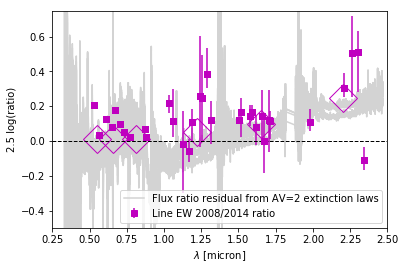

In [17]:
fig2,ax=plt.subplots(1,1,figsize=(6,4))

# CCM89, O94, F99, F04, M14, G16
ext=de.F99(Rv=3)
ax.plot(allwav_dec02,2.0*ext(allwav_dec02)-ext_dec02,'lightgrey',label='Flux ratio residual from AV=2 extinction laws',zorder=-32)
ext=de.CCM89(Rv=3)
ax.plot(allwav_dec02,2.0*ext(allwav_dec02)-ext_dec02,'lightgrey',zorder=-32)
ext=de.O94(Rv=3)
ax.plot(allwav_dec02,2.0*ext(allwav_dec02)-ext_dec02,'lightgrey',zorder=-32)
ext=de.F04(Rv=3)
ax.plot(allwav_dec02,2.0*ext(allwav_dec02)-ext_dec02,'lightgrey',zorder=-32)
ext=de.M14(Rv=3)
ax.plot(allwav_dec02,2.0*ext(allwav_dec02)-ext_dec02,'lightgrey',zorder=-32)


# ax.plot(allwav_dec02,0.05*allwav_dec02**2,'magenta',linestyle='dashed',zorder=-32)



ax.plot(lines['LineLambda'],2.5*np.log10(lines['EWratio']),'ms',label='_EW ratio')

lower_err = 2.5*np.log10(lines['EWratio']) - 2.5*np.log10(lines['EWmin'])
upper_err = 2.5*np.log10(lines['EWmax']) - 2.5*np.log10(lines['EWratio'])
asymmetric_error = [lower_err, upper_err]
ax.errorbar(lines['LineLambda'],2.5*np.log10(lines['EWratio']), yerr=asymmetric_error, fmt='ms',label='Line EW 2008/2014 ratio')


filtwave=np.array([.55,.66,.81,1.22,1.65,2.2])
choose_logratios=np.array([.01,.01,.01,0.05,.1,.25])

ax.plot(filtwave,choose_logratios,'mD',markersize=20,fillstyle='none')

ax.set_ylim(-0.5,0.75)
ax.set_xlim(0.25,2.5)
ax.set_xlabel('$\lambda$ [micron]')
ax.set_ylabel('2.5 log(ratio)')

ax.plot([0,3],[0,0],'--k',linewidth=1)

ax.legend(loc='lower right')

# plt.show()
plt.savefig('veiling_emission.eps',bbox_inches='tight')

In [18]:
10**(0.4*choose_logratios)

array([1.00925289, 1.00925289, 1.00925289, 1.04712855, 1.0964782 ,
       1.25892541])

# Figure: Color-color/mag plots, corrected for veiling <a name="colorcolorall"></a>

In [19]:
mags1 # 2008

array([ 8.12545762,  8.63775381,  9.4796061 , 10.54233954, 11.57235532,
       12.84902046, 13.99366631])

In [20]:
mags2 # 2014

array([ 8.1190166 ,  8.90018651, 10.03621318, 11.49856709, 12.84199828,
       14.84816432, 16.58947888])

In [27]:
# mags3=np.array([ 8.36894759,  9.03899776, 10.11555302, 11.54195829, 12.87070442, 14.86464899, 16.60032636])
mags3 = mags2 - np.array([-0.25, -0.1, -0.05, 0, 0, 0, 0]) # 2014 w/o veiling relative to 2008, dimmer
mags3

array([ 8.3690166 ,  9.00018651, 10.08621318, 11.49856709, 12.84199828,
       14.84816432, 16.58947888])

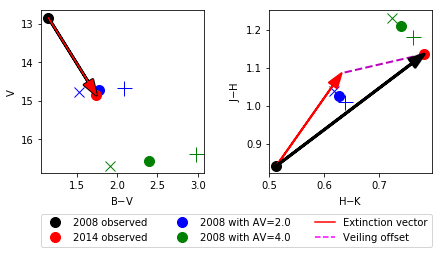

In [28]:
fig,axes=plt.subplots(1,2,figsize=(7,3))

j=5
axes[0].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j],'+',color='blue',markersize=15)
axes[0].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j],'o',color='blue',markersize=10)
axes[0].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j],'x',color='blue',markersize=10)
axes[0].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j],'+',color='green',markersize=15)
axes[0].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j],'o',color='green',markersize=10)
axes[0].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j],'x',color='green',markersize=10)

axes[0].annotate("",xy=(mags3[j+1]-mags3[j],mags3[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='black',headwidth=10,headlength=15,width=0.1,linewidth=3))
axes[0].annotate("",xy=(mags3[j+1]-mags3[j],mags3[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='red',headwidth=10,headlength=15,width=0.1,linewidth=1))
# axes[0].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j]), xycoords='data',
#     xytext=(mags3[j+1]-mags3[j],mags3[j]),textcoords='data',
#     arrowprops=dict(color='magenta',headwidth=8,headlength=12,width=0.1))

axes[0].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[0].set_ylabel(bands[j])

j=0
axes[1].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008 observed', markersize=10)
axes[1].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red',label='2014 observed', markersize=10)

j=0     
axes[1].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='_2008 with AV=2.0 RV=2',markersize=15)
axes[1].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008 with AV=2.0',markersize=10)
axes[1].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='_2008 with AV=2.0 RV=5',markersize=10)
axes[1].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='_2008 with AV=4.0 RV=2',markersize=15)
axes[1].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008 with AV=4.0',markersize=10)
axes[1].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='_2008 with AV=4.0 RV=5',markersize=10)

axes[1].annotate("",xy=(mags3[j+1]-mags3[j],mags3[j+2]-mags3[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='red',headwidth=10,headlength=15,width=0.1,linewidth=2))
# axes[1].annotate("",xy=(mags3[j+1]-mags3[j],mags3[j+2]-mags3[j+1]), xycoords='data',
#     xytext=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]),textcoords='data',
#    arrowprops=dict(color='magenta',headwidth=0,headlength=12,width=0.1,linestyle='dashed'))
axes[1].plot([mags2[j+1]-mags2[j],mags3[j+1]-mags3[j]],[mags2[j+2]-mags2[j+1],mags3[j+2]-mags3[j+1]],'--m',linewidth=2)
axes[1].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='black',headwidth=10,headlength=15,width=0.1,linewidth=3))

axes[1].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[1].set_ylabel(bands[j+2]+'$-$'+bands[j+1])

j=5
axes[0].plot(mags1[j+1]-mags1[j],mags1[j],'o',color='black',markersize=10)
axes[0].plot(mags2[j+1]-mags2[j],mags2[j],'o',color='red',markersize=10)


axes[1].plot([],'red',label='Extinction vector')
axes[1].plot([],'magenta',linestyle='dashed',label='Veiling offset')
axes[1].plot([],'black',label='_Total',linewidth=3)

fig.subplots_adjust(wspace=0.4)
# axes[1].legend(loc='center right', bbox_to_anchor=(.5,1.4))

axes[0].set_ylim(axes[0].get_ylim()[::-1])

axes[1].legend(bbox_to_anchor=(-1.40, -0.45, 2.4, 1.), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.0)

# plt.show()
plt.savefig('colormags_veiling.eps',bbox_inches='tight')

# NIR Color-Mag

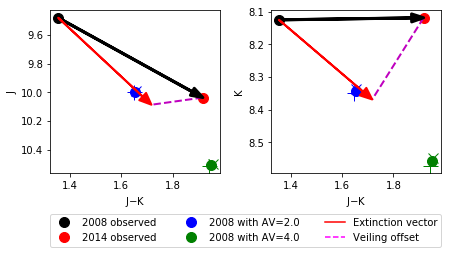

In [48]:
fig,[ax2,ax0]=plt.subplots(1,2,figsize=(7,3))

ax2.plot(mags1[2]-mags1[0],mags1[2],'ko',markersize=10)
ax2.plot(mags2[2]-mags2[0],mags2[2],'ro',markersize=10)
ax2.plot([mags2[2]-mags2[0],mags3[2]-mags3[0]],[mags2[2],mags3[2]],'--m',linewidth=2)

ax0.plot(mags1[2]-mags1[0],mags1[0],'ko',label='2008 observed',markersize=10)
ax0.plot(mags2[2]-mags2[0],mags2[0],'ro',label='2014 observed',markersize=10)
ax0.plot([mags2[2]-mags2[0],mags3[2]-mags3[0]],[mags2[0],mags3[0]],'--m',linewidth=2)

ax0.annotate("",xy=(mags2[2]-mags2[0],mags2[0]), xycoords='data',
            xytext=(mags1[2]-mags1[0],mags1[0]),textcoords='data',
            arrowprops=dict(color='black',headwidth=8,headlength=12,width=0.1,linewidth=3))
ax0.annotate("",xy=(mags3[2]-mags3[0],mags3[0]), xycoords='data',
            xytext=(mags1[2]-mags1[0],mags1[0]),textcoords='data',
            arrowprops=dict(color='red',headwidth=10,headlength=12,width=0.1,linewidth=2))

ax2.annotate("",xy=(mags2[2]-mags2[0],mags2[2]), xycoords='data',
            xytext=(mags1[2]-mags1[0],mags1[2]),textcoords='data',
            arrowprops=dict(color='black',headwidth=8,headlength=12,width=0.1,linewidth=3))
ax2.annotate("",xy=(mags3[2]-mags3[0],mags3[2]), xycoords='data',
            xytext=(mags1[2]-mags1[0],mags1[2]),textcoords='data',
            arrowprops=dict(color='red',headwidth=10,headlength=12,width=0.1,linewidth=2))

ax2.plot(mags1ext[0,2]-mags1ext[0,0],mags1ext[0,2],'+',color='blue',markersize=15)
ax2.plot(mags1ext[1,2]-mags1ext[1,0],mags1ext[1,2],'o',color='blue',markersize=10)
ax2.plot(mags1ext[2,2]-mags1ext[2,0],mags1ext[2,2],'x',color='blue',markersize=10)
ax2.plot(mags1ext[3,2]-mags1ext[3,0],mags1ext[3,2],'+',color='green',markersize=15)
ax2.plot(mags1ext[4,2]-mags1ext[4,0],mags1ext[4,2],'o',color='green',markersize=10)
ax2.plot(mags1ext[5,2]-mags1ext[5,0],mags1ext[5,2],'x',color='green',markersize=10)

ax0.plot(mags1ext[0,2]-mags1ext[0,0],mags1ext[0,0],'+',color='blue',markersize=15)
ax0.plot(mags1ext[1,2]-mags1ext[1,0],mags1ext[1,0],'o',color='blue',label='2008 with AV=2.0',markersize=10)
ax0.plot(mags1ext[2,2]-mags1ext[2,0],mags1ext[2,0],'x',color='blue',markersize=10)
ax0.plot(mags1ext[3,2]-mags1ext[3,0],mags1ext[3,0],'+',color='green',markersize=15)
ax0.plot(mags1ext[4,2]-mags1ext[4,0],mags1ext[4,0],'o',color='green',label='2008 with AV=4.0',markersize=10)
ax0.plot(mags1ext[5,2]-mags1ext[5,0],mags1ext[5,0],'x',color='green',markersize=10)

ax0.set_ylim(ax0.get_ylim()[::-1])
ax0.set_xlabel('J$-$K')
ax0.set_ylabel('K')

ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('J$-$K')
ax2.set_ylabel('J')
   
fig.subplots_adjust(wspace=0.3)

ax0.plot([],'red',label='Extinction vector')
ax0.plot([],'magenta',linestyle='dashed',label='Veiling offset')
ax0.plot([],'black',label='_Total',linewidth=3)

ax0.legend(bbox_to_anchor=(-1.30, -0.45, 2.3, 1.), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.0)

plt.savefig('NIRcolormags.eps',bbox_inches='tight')
plt.show()

# Figure: SED <a name="sed"></a>

In [29]:
lam_2008, model_2008=np.loadtxt('draine_2008_model.txt',unpack=True,skiprows=1)
lam_2014, model_2014=np.loadtxt('draine_2014_model.txt',unpack=True,skiprows=1)

In [30]:
lam=np.array([3.368, 4.618])
fnu0=np.array([309.540, 171.787])
nu=3E14/lam

W2008=np.array([7.42,6.76]) # Greg's table
W2014=np.array([6.82,6.23]) # Greg's table
W2015=np.array([6.71,5.88]) # Greg's table

fnu2008=fnu0*10**(-W2008/2.5)
fnu2014=fnu0*10**(-W2014/2.5)
fnu2015=fnu0*10**(-W2015/2.5)

# 1 Jy = 10^-23 erg/s/cm^2/Hz
flam2008=1E-23*fnu2008*3E14/lam**2
flam2014=1E-23*fnu2014*3E14/lam**2
flam2015=1E-23*fnu2015*3E14/lam**2

C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\krisl\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


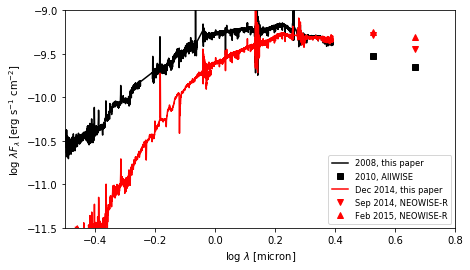

In [31]:
# lam F lam

xxx=np.log10(allwav_2008.value)
yyy=np.log10(allwav_2008.value*alldata_2008.value*10000.)

fig,ax1=plt.subplots(1,1,figsize=(7,4))


ax1.plot(xxx[yyy>-11],yyy[yyy>-11],'black',label='2008, this paper')
ax1.plot(np.log10(lam),np.log10(lam*flam2008),'sk', label='2010, AllWISE')

ax1.plot(np.log10(allwav_dec02.value),np.log10(allwav_dec02.value*alldata_dec02.value*10000.),'red',label='Dec 2014, this paper')
ax1.plot(np.log10(lam),np.log10(lam*flam2014),'vr', label='Sep 2014, NEOWISE-R')
ax1.plot(np.log10(lam),np.log10(lam*flam2015),'^r', label='Feb 2015, NEOWISE-R')

# ax1.plot(np.log10(lam_2008),np.log10(model_2008),'black',linestyle='dotted',linewidth=2,label='Thin Disk Model')
# ax1.plot(np.log10(lam_2014),np.log10(model_2014),'red',linestyle='dotted',linewidth=2,label='Thick Disk Model')

ax1.set_ylim(-11.5,-9)
ax1.set_xlim(-0.5,0.8)
ax1.set_xlabel('log $\lambda$ [micron]')
ax1.set_ylabel('log $\lambda F_\lambda$ [erg s$^{-1}$ cm$^{-2}$]')
ax1.legend(loc='lower right',fontsize='small')


# plt.show()
plt.savefig('SED.eps',bbox_inches='tight')

# Figure: Linear EW ratio for the data section

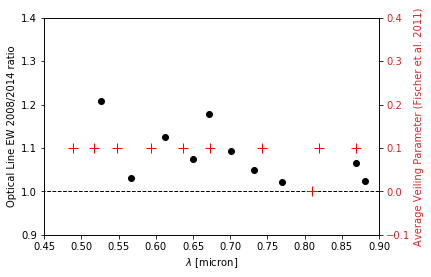

In [32]:
fig2,ax=plt.subplots(1,1,figsize=(6,4))


ax.plot(lines['LineLambda'],(lines['EWratio']),'ko',label='_EW ratio')

lower_err = (lines['EWratio']) - (lines['EWmin'])
upper_err = (lines['EWmax']) - (lines['EWratio'])
asymmetric_error = [lower_err, upper_err]
# ax.errorbar(lines['LineLambda'],(lines['EWratio']), yerr=asymmetric_error, fmt='ko',label='Line EW ratio range')


ax.set_ylim(0.9,1.4)
ax.set_xlim(0.45,0.90)
ax.set_xlabel('$\lambda$ [micron]')
ax.set_ylabel('Optical Line EW 2008/2014 ratio')


fishwave1=np.array([.4883,.5165,.5485,.5942,.6365,.6725,.7427,.8102,.8695,1.0800]) # Fischer 2011
fishwave2=np.array([.82,.91,.97,1.05,1.18,1.31,1.98,2.11,2.20,2.26]) # Fischer 2011
fishveilr1=np.array([.1,.1,.1,.1,.1,.1,.1,0,.1,.1]) # Fischer 2011, Table 2 HIRES+NIRSPEC
fishveilr2=np.array([.1,.25,.2,.2,.2,.2,.3,.3,.3,.5]) # Fischer 2011, Table 2 SpeX
# ourveilr=np.array([.1,.1,.1,.1,.3,.5,.7]) 

ax2=ax.twinx()
color='tab:red'
ax2.plot(fishwave1,fishveilr1,'r+',markersize=10)
ax2.plot(fishwave2,fishveilr2,'r+',markersize=10)

ax2.set_ylabel('Average Veiling Parameter (Fischer et al. 2011)',color=color)
ax2.set_ylim(-0.1,.4)
ax2.tick_params(axis='y',labelcolor=color)

ax.plot([0,3],[1,1],'--k',linewidth=1)

# ax.legend(loc='lower right')

# plt.show()
plt.savefig('optical_veiling.eps')